In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split


In [3]:
tem_df = pd.read_csv('GlobalTemperatures.csv')
tem_df.head(4)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
nRow, nCol = tem_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3192 rows and 9 columns


In [5]:
tem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [6]:
tem_df.isnull().sum()  # count of null values

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [7]:
tem_df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [8]:
def convertTemtoFahrenheit(tem):
    teminFahrenheit = (tem * 1.8) + 32
    return teminFahrenheit

selected_cols = ['LandAverageTemperature','LandMaxTemperature','LandMinTemperature','LandAndOceanAverageTemperature']

tem_df[selected_cols] = tem_df[selected_cols].apply(convertTemtoFahrenheit)

tem_df.tail(4)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3188,2015-09-01,55.3982,0.079,65.9210,0.088,44.9582,0.229,62.6882,0.058
3189,2015-10-01,51.4418,0.102,61.6100,0.059,41.4176,0.115,61.3220,0.062
3190,2015-11-01,45.3794,0.119,55.2056,0.093,35.8826,0.106,59.4536,0.063
3191,2015-12-01,41.9324,0.100,51.3050,0.154,32.5166,0.099,58.5932,0.062


In [9]:
# Lets first handle the missing values as we will see that there is alot of missig values in the start of dataset of differnet columns 
# so we will delete these missing values rows in this scenerio only

print("Land records start from:", tem_df[tem_df.LandAverageTemperature.notna()].index.min())
print("Ocean records start from:", tem_df[tem_df.LandAndOceanAverageTemperature.notna()].index.min())

# As we will see that ocean records starts from 1200 so we have to remove starting 1200 rows 




Land records start from: 0
Ocean records start from: 1200


In [10]:
new_tem_df = tem_df[tem_df.index > 1200]
new_tem_df.isnull().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [11]:
new_tem_df.head(4)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1201,1850-02-01,37.5278,1.275,49.9460,3.007,27.8762,1.623,56.4584,0.414
1202,1850-03-01,40.9172,0.955,50.6246,2.401,28.5710,1.410,57.2774,0.341
1203,1850-04-01,44.9906,0.665,55.2812,1.004,33.8324,1.329,58.4006,0.267
1204,1850-05-01,50.0072,0.617,60.1790,2.406,38.8598,1.347,59.9126,0.249


In [12]:
# Now lets seperate date to monts and  years
def converToDateTime(df):
  df = df.copy()
  df['dt'] = pd.to_datetime(df['dt'])
  df['Month'] = df['dt'].dt.month
  df['Year'] = df['dt'].dt.year
  return df

In [13]:
# Convert date to a DateTime object
df = converToDateTime(new_tem_df)
# Drop Date and Months
temp_df_year = df.drop(['dt', 'Month'], axis=1)
# Set the index of the dataframe to Year
temp_df_year = temp_df_year.set_index('Year')
temp_df_year.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1850,37.5278,1.275,49.9460,3.007,27.8762,1.623,56.4584,0.414
1850,40.9172,0.955,50.6246,2.401,28.5710,1.410,57.2774,0.341
1850,44.9906,0.665,55.2812,1.004,33.8324,1.329,58.4006,0.267
1850,50.0072,0.617,60.1790,2.406,38.8598,1.347,59.9126,0.249
1850,55.6700,0.614,66.1028,2.817,44.7908,0.857,61.4354,0.245


In [14]:

# This time Use Month as Index
temp_df_month = df.drop(['dt', 'Year'], axis=1)
# Set the index of the dataframe to Year
temp_df_month = temp_df_month.set_index('Month')
temp_df_month.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Month,,,,,,,,
2,37.5278,1.275,49.9460,3.007,27.8762,1.623,56.4584,0.414
3,40.9172,0.955,50.6246,2.401,28.5710,1.410,57.2774,0.341
4,44.9906,0.665,55.2812,1.004,33.8324,1.329,58.4006,0.267
5,50.0072,0.617,60.1790,2.406,38.8598,1.347,59.9126,0.249
6,55.6700,0.614,66.1028,2.817,44.7908,0.857,61.4354,0.245


In [15]:
# new_tem_df['Month'] = pd.to_datetime(new_tem_df['dt']).dt.month
# new_tem_df.head()
# new_tem_df = new_tem_df.drop(['Month'], axis=1)

temp_df_year.shape
# temp_df_year.index
# temp_df_year.head(2)

(1991, 8)

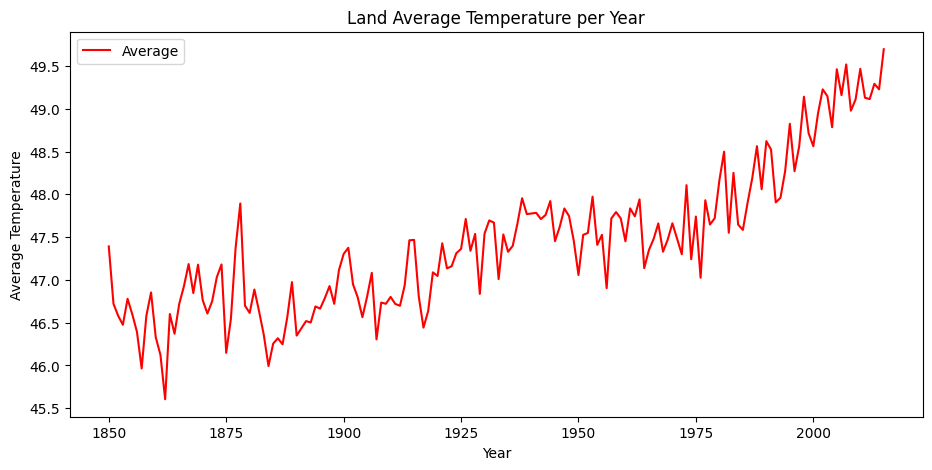

In [16]:
def plot_average_temp(df,col1,col2,label):
  cols = [col1,col2]
  temp_df = df[cols]
  average_per_year = temp_df.groupby(temp_df.index)[cols].mean()
  # average_per_year['lower temp'] = average_per_year[col1] - average_per_year[col2]
  # average_per_year['upper temp'] = average_per_year[col1] + average_per_year[col2]

  plt.figure(figsize=(11,5))
  # plt.plot(average_per_year.index, , color='red', label='Average')
  sns.lineplot(x=average_per_year.index, y= average_per_year[col1], data=average_per_year,color='red',label='Average')

  # plt.plot()
  # plt.fill_between(average_per_year.index, average_per_year[col2], color='lightgreen', alpha=0.4, label='Temperature Uncertainty Boundaries')
  plt.xlabel('Year')
  plt.ylabel('Average Temperature')
  plt.title(label)
  plt.show
  # plt.legend(loc='best')
  
  # Land Average Temperature
plot_average_temp(temp_df_year,'LandAverageTemperature','LandAverageTemperatureUncertainty','Land Average Temperature per Year')

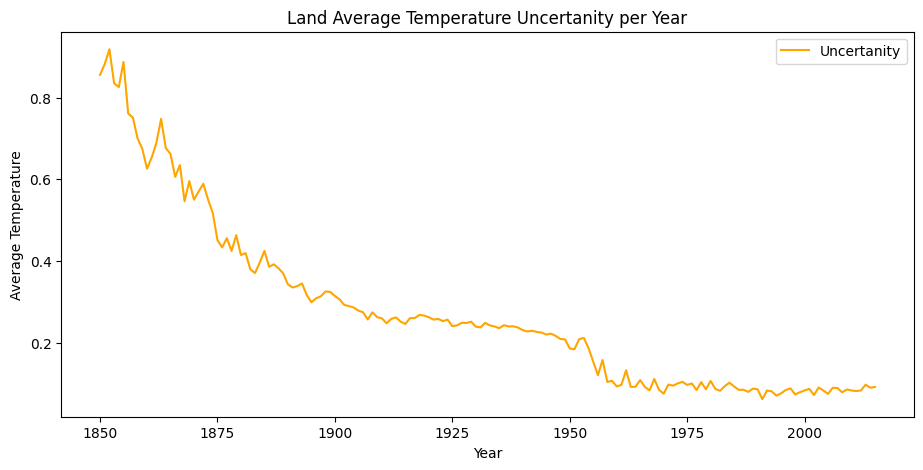

In [17]:
def plot_average_temp(df,col1,col2,label):
  cols = [col1,col2]
  temp_df = df[cols]
  average_per_year = temp_df.groupby(temp_df.index)[cols].mean()


  plt.figure(figsize=(11,5))
  # plt.plot(average_per_year.index, average_per_year[col2], color='orange', alpha=0.7, label='Temperature Uncertainty Boundarie')
  sns.lineplot(x=average_per_year.index, y= average_per_year[col2], data=average_per_year,color='orange',label='Uncertanity')
 
  plt.xlabel('Year')
  plt.ylabel('Average Temperature')
  plt.title(label)
  # plt.legend(loc='best')
  plt.show()
  
  # Land Average Temperature
plot_average_temp(temp_df_year,'LandAverageTemperature','LandAverageTemperatureUncertainty','Land Average Temperature Uncertanity per Year')

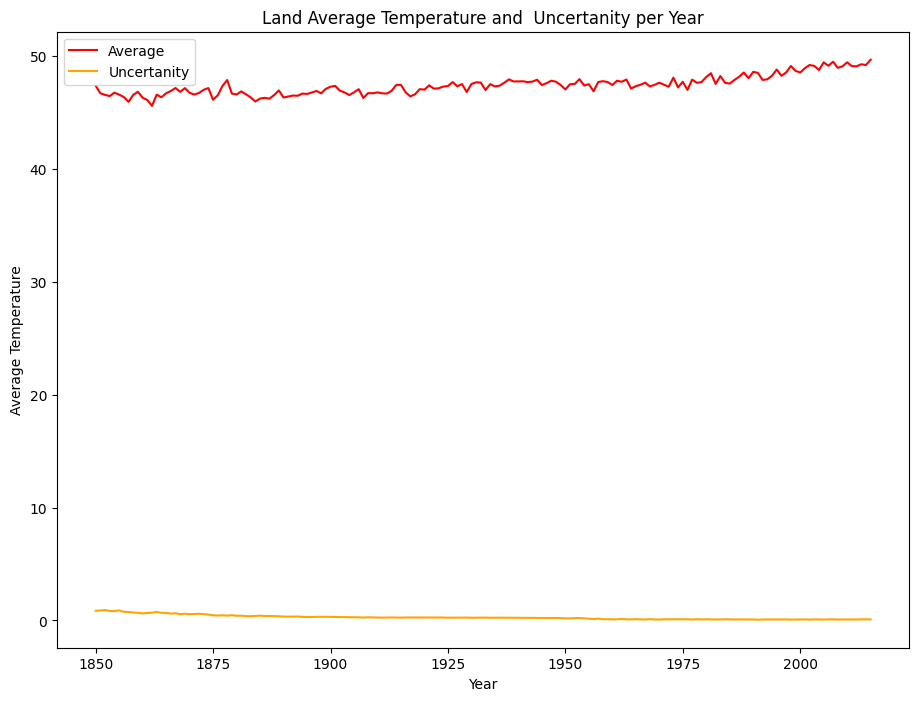

In [18]:
def plot_average_temp(df,col1,col2,label):
  cols = [col1,col2]
  temp_df = df[cols]
  average_per_year = temp_df.groupby(temp_df.index)[cols].mean()


  plt.figure(figsize=(11,8))
#   plt.plot(average_per_year.index, average_per_year[col2], color='orange', alpha=0.7, label='Temperature Uncertainty Boundarie')
  plt.plot(average_per_year.index, average_per_year[col1], color='red', label='Average')
  sns.lineplot(x=average_per_year.index, y= average_per_year[col2], data=average_per_year,color='orange',label='Uncertanity')
 
  plt.xlabel('Year')
  plt.ylabel('Average Temperature')
  plt.title(label)
  # plt.legend(loc='best')
  plt.show()
  
  # Land Average Temperature
plot_average_temp(temp_df_year,'LandAverageTemperature','LandAverageTemperatureUncertainty','Land Average Temperature and  Uncertanity per Year')

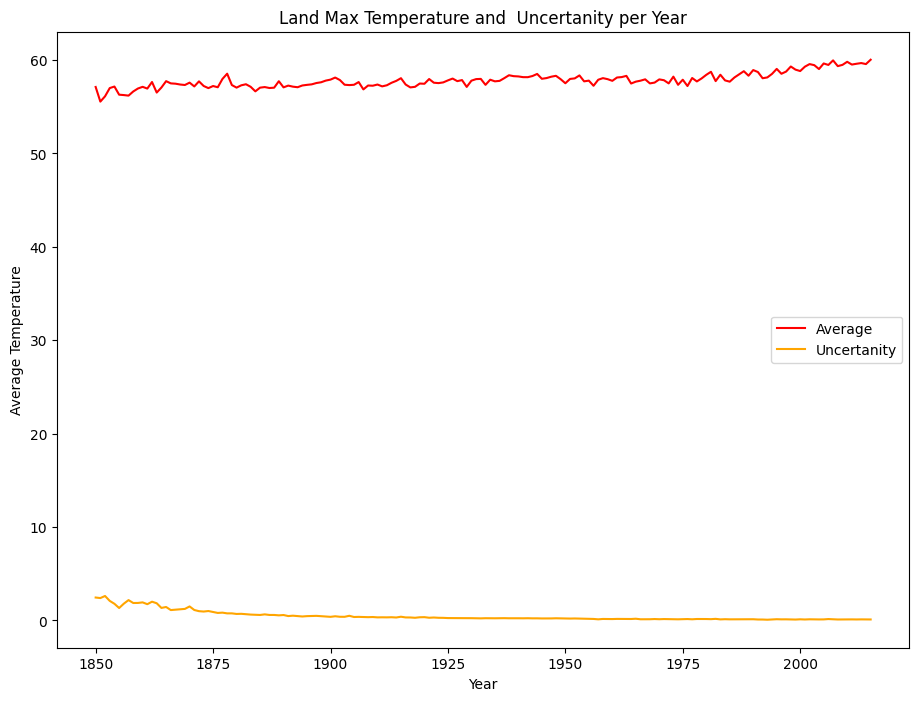

In [19]:
def plot_average_temp(df,col1,col2,label):
  cols = [col1,col2]
  temp_df = df[cols]
  average_per_year = temp_df.groupby(temp_df.index)[cols].mean()


  plt.figure(figsize=(11,8))
#   plt.plot(average_per_year.index, average_per_year[col2], color='orange', alpha=0.7, label='Temperature Uncertainty Boundarie')
  plt.plot(average_per_year.index, average_per_year[col1], color='red', label='Average')
  sns.lineplot(x=average_per_year.index, y= average_per_year[col2], data=average_per_year,color='orange',label='Uncertanity')
 
  plt.xlabel('Year')
  plt.ylabel('Average Temperature')
  plt.title(label)
  # plt.legend(loc='best')
  plt.show()
  
  # Land Average Temperature
plot_average_temp(temp_df_year,'LandMaxTemperature','LandMaxTemperatureUncertainty','Land Max Temperature and  Uncertanity per Year')

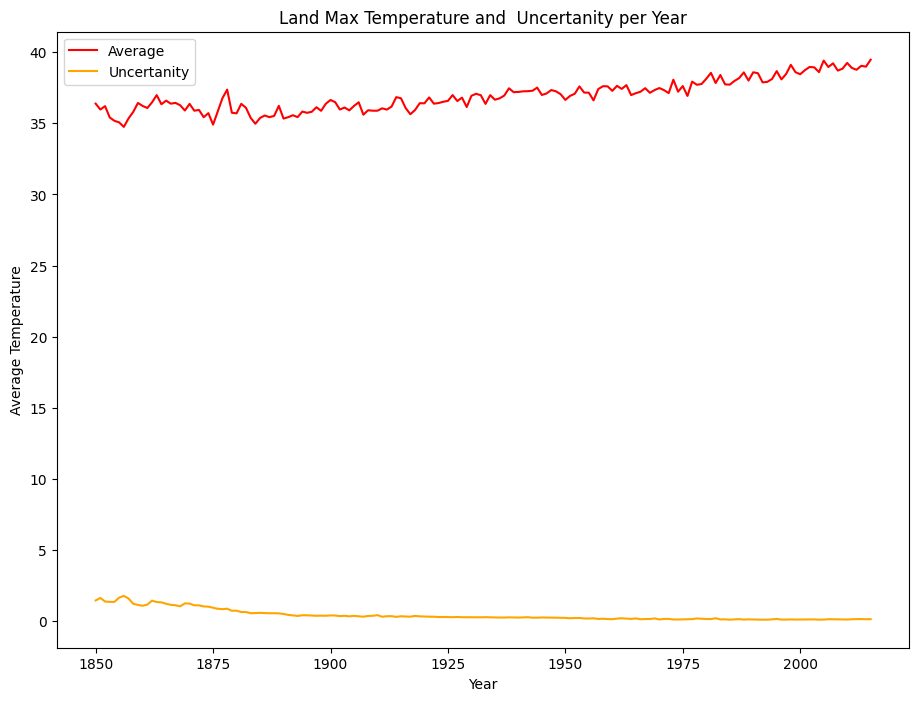

In [20]:
def plot_average_temp(df,col1,col2,label):
  cols = [col1,col2]
  temp_df = df[cols]
  average_per_year = temp_df.groupby(temp_df.index)[cols].mean()


  plt.figure(figsize=(11,8))
#   plt.plot(average_per_year.index, average_per_year[col2], color='orange', alpha=0.7, label='Temperature Uncertainty Boundarie')
  plt.plot(average_per_year.index, average_per_year[col1], color='red', label='Average')
  sns.lineplot(x=average_per_year.index, y= average_per_year[col2], data=average_per_year,color='orange',label='Uncertanity')
 
  plt.xlabel('Year')
  plt.ylabel('Average Temperature')
  plt.title(label)
  # plt.legend(loc='best')
  plt.show()
  
  # Land Average Temperature
plot_average_temp(temp_df_year,'LandMinTemperature','LandMinTemperatureUncertainty','Land Max Temperature and  Uncertanity per Year')

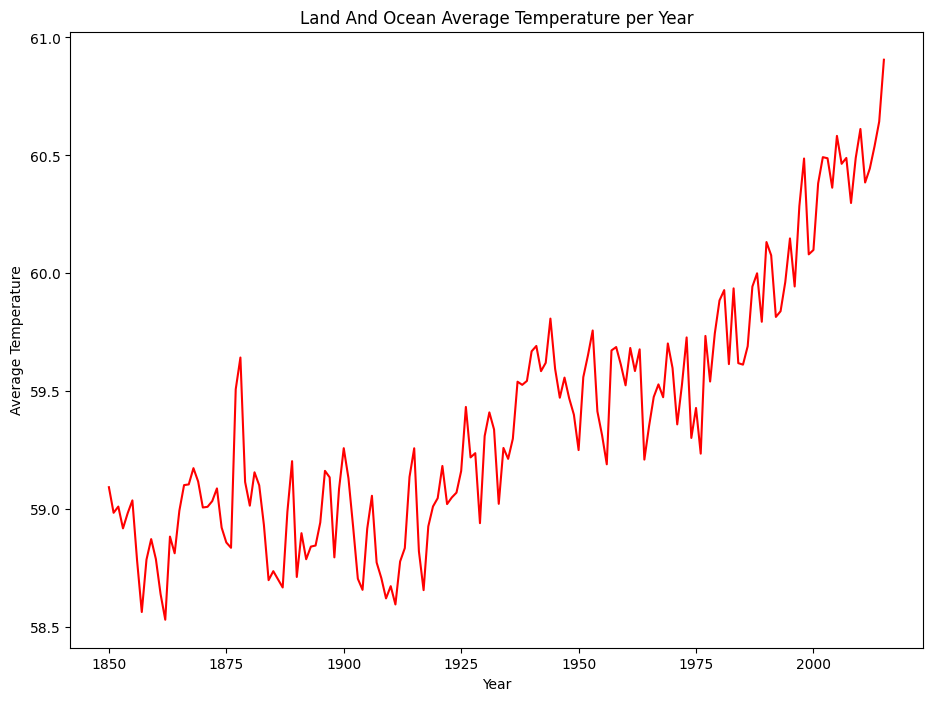

In [21]:
def plot_average_temp(df,col1,col2,label):
  cols = [col1,col2]
  temp_df = df[cols]
  average_per_year = temp_df.groupby(temp_df.index)[cols].mean()


  plt.figure(figsize=(11,8))
#   plt.plot(average_per_year.index, average_per_year[col2], color='orange', alpha=0.7, label='Temperature Uncertainty Boundarie')
  plt.plot(average_per_year.index, average_per_year[col1], color='red', label='Average')
  # sns.lineplot(x=average_per_year.index, y= average_per_year[col2], data=average_per_year,color='orange',label='Uncertanity')
 
  plt.xlabel('Year')
  plt.ylabel('Average Temperature')
  plt.title(label)
  # plt.legend(loc='best')
  plt.show()
  
  # Land Average Temperature
plot_average_temp(temp_df_year,'LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty','Land And Ocean Average Temperature per Year')

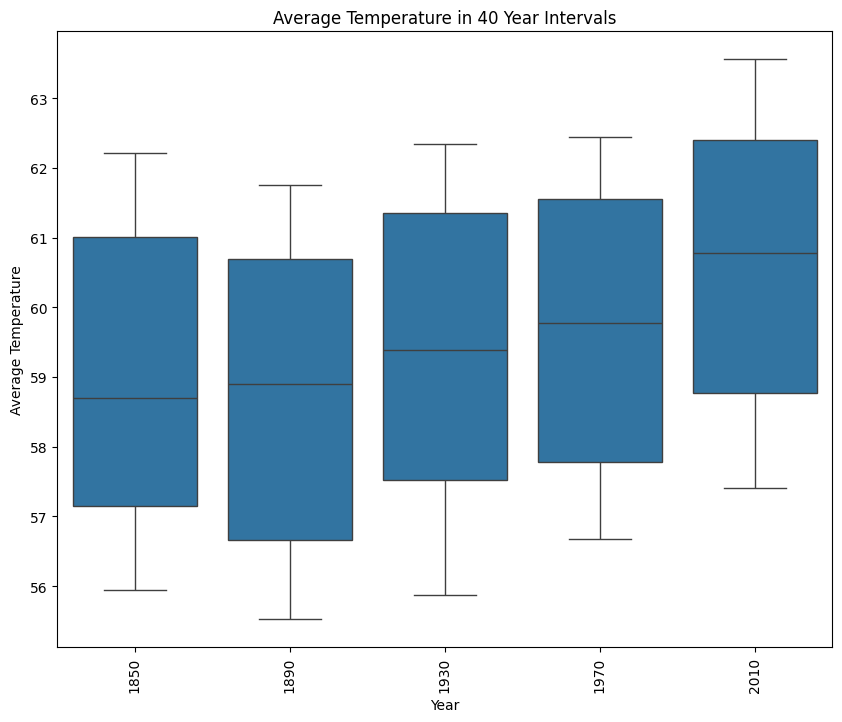

In [22]:
# From these graphs we understand that most of the uncertanity is occuring due to lower the temperature that why the average graph is upwords

# Now creating box plot  for further explaination
year_intervals = [1850, 1890, 1930, 1970, 2010]
# average_per_year = temp_df_year.groupby(temp_df_year.index)[cols].mean()
temp_df_every_40_years = temp_df_year[temp_df_year.index.isin(year_intervals)]
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data = temp_df_every_40_years, x=temp_df_every_40_years.index, y=temp_df_every_40_years['LandAndOceanAverageTemperature'] )
ax.set(ylabel='Average Temperature', title="Average Temperature in 40 Year Intervals")
for item in ax.get_xticklabels():
    item.set_rotation(90)

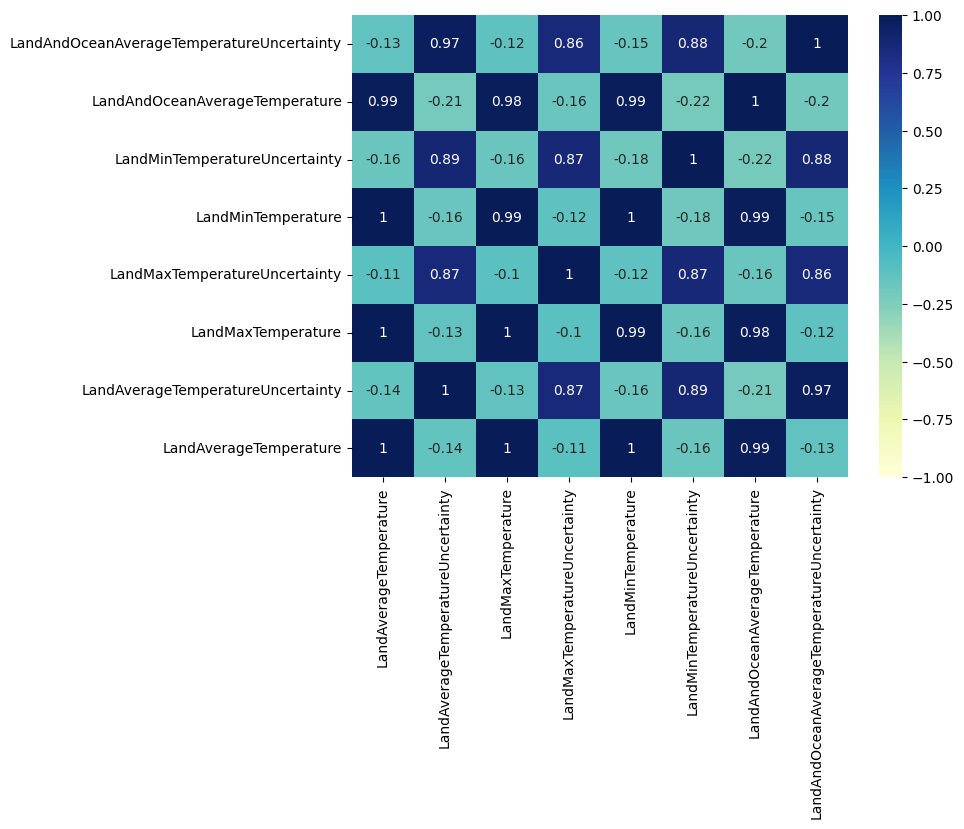

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
corr_matrix = np.abs(temp_df_year.corr())
sns.heatmap(temp_df_year.corr(),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

In [24]:
cols_to_drop = ['LandMaxTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty',
                'LandAverageTemperatureUncertainty','LandMinTemperatureUncertainty']
df = temp_df_year.drop(cols_to_drop,axis=1)
df.head()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
Year,,,,
1850,37.5278,49.9460,27.8762,56.4584
1850,40.9172,50.6246,28.5710,57.2774
1850,44.9906,55.2812,33.8324,58.4006
1850,50.0072,60.1790,38.8598,59.9126
1850,55.6700,66.1028,44.7908,61.4354


In [26]:
df.to_csv('updated.csv', index=True)

In [24]:
# Features, X
X = df.drop('LandAndOceanAverageTemperature',axis=1)
# Target, Y
Y = df['LandAndOceanAverageTemperature']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=40)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1493, 3)
Shape of X_test:  (498, 3)
Shape of y_train:  (1493,)
Shape of y_test:  (498,)


In [32]:
y_pred = [y_train.mean()] * len(y_train)
print(y_pred)


[59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091761553, 59.43211091

In [33]:
from sklearn.metrics import mean_squared_error  # for calculatng the loss
print('Base Mean Square Error (in degrees):', round(mean_squared_error(y_train,y_pred),2))

Base Mean Square Error (in degrees): 5.33


In [34]:
from sklearn.metrics import mean_absolute_error
print('Base Mean Absolute Error (in degrees):', round(mean_absolute_error(y_train,y_pred),2))  

Base Mean Square Error (in degrees): 2.05


In [35]:
# Now lets do a cross validation for models selection

from sklearn.model_selection import cross_val_score
def score(model,train_data,test_data,num_folds ):
    print("Cross-validation using {} folds".format(num_folds))
    scoring_array = cross_val_score(model,train_data,test_data,cv=num_folds)
    return scoring_array
        
    

In [36]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
cv_results = score(linear,X_train,y_train,num_folds=5)
print(cv_results)

Cross-validation using 5 folds
[0.97852545 0.97670756 0.97882641 0.97771353 0.9727142 ]


<Axes: title={'center': 'Elbow Curve from RMSE'}, xlabel='k', ylabel='RMSE'>

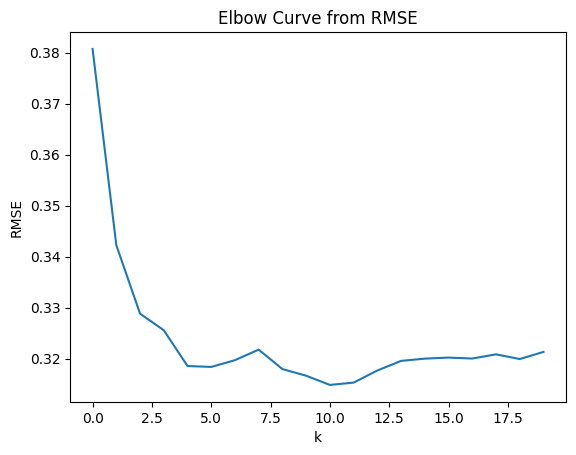

In [37]:
# Knearest regressor by using model first we have to kind the best k value using elbow method
# Find the RMSE to plot an Elbow Curve

from sklearn import neighbors
from math import sqrt

rmse_val = [] # Store RMSE values for different k
for k in range(20):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(X_train, y_train)  # Fit the model
    pred=model.predict(X_test) # Make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) # Calculate RMSE
    rmse_val.append(error) # Store RMSE values

figsize=(8, 6)
curve = pd.DataFrame(rmse_val) # Elbow curve
curve.plot(title="Elbow Curve from RMSE", xlabel="k", ylabel="RMSE", legend=None)

In [38]:
#using elbow method we find the best value of k is 8
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 8)
cv_results = score(knn_model,X_train,y_train,num_folds=5)
print(cv_results)

Cross-validation using 5 folds
[0.98011135 0.98066625 0.98319511 0.98106293 0.97757803]


In [40]:
from sklearn import ensemble
rf_model = ensemble.RandomForestRegressor(n_estimators=20, n_jobs=-1)
cv_results = score(rf_model,X_train,y_train,num_folds=5)
print(cv_results)

Cross-validation using 5 folds
[0.98090212 0.97961797 0.98186963 0.97857075 0.97715633]


In [41]:

from sklearn.svm import SVR
svm_model = SVR(kernel = 'rbf')
cv_results = score(svm_model,X_train,y_train,num_folds=5)
print(cv_results)

Cross-validation using 5 folds
[0.97893311 0.97820214 0.98037683 0.97771435 0.97253979]


In [44]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [52]:
y_pred = knn_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.21566423308774293


In [51]:
y_pred = knn_model.predict(X_test)
mae = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mae)

Mean Squared Error: 0.10353264617846386


In [47]:
print('KNN Regressor Train MAE (in degrees):', round(mean_squared_error(y_train,knn_model.predict(X_train)),2))
# As you can see that the loss is reduced from 5.6 to 0.08 


KNN Regressor Train MAE (in degrees): 0.08


In [48]:
print('KNN Regressor Test MAE (in degrees):', round(mean_squared_error(y_test,knn_model.predict(X_test)),2))
# 

KNN Regressor Test MAE (in degrees): 0.1


In [53]:
# stored model in a pickal file
import joblib

MODEL_PATH = 'model.pkl'
joblib.dump(knn_model,MODEL_PATH)


['model.pkl']

In [1]:
import joblib
import os

MODEL_PATH = "model.pkl"

def test_model():
    features = [1.786, 8.972, 2.818]  # Example input

    try:
        # Load the model
        if not os.path.exists(MODEL_PATH):
            print("Model not found.")
            return
        
        knn_model = joblib.load(MODEL_PATH)
        print("Model loaded successfully.")

        # Predict using the model
        prediction = knn_model.predict([features])
        print("Prediction:", round(prediction),2)

    except Exception as e:
        print("Exception:", e)

if __name__ == "__main__":
    test_model()


Model loaded successfully.
Prediction: [55.2947]


/home/zeeshan/Documents/intern_lahore/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
